In [43]:
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f_orgnl - best 12, th=0.435: 0.6993865030674846; rf (): 0.7310657596371882; best k-nn (33): 0.6229326513213981
f_op_1 - best : ; rf: ; best k-nn (): 
f_op_2 - best : ; rf: ; best k-nn (): 
f_op_3 - best : ; rf: ; best k-nn (): 

In [3]:
# Load the data
sti_features = 'train_75_people_data.csv'
#sti_features ='features_optimized_1.csv'
#sti_features ='features_optimized_2.csv'
#sti_features ='features_optimized_3.csv'

data = pd.read_csv(sti_features)

In [ ]:


# Assuming 'data' and 'y' are already defined
#X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'black_presence', 'atypicturesal', 'blue-whiteveils', 'asymmetry_values']]
X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
#X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y=data['cancer_or_not']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


selector = RFE(LogisticRegression(), n_features_to_select=12) # Selects the top 5 features
X_selected = selector.fit_transform(X_scaled, y)
clf = LogisticRegression().fit(X_selected, y)
# Train the model




# Get probabilities of the positive class
probabilities = clf.predict_proba(X_selected)[:, 1]
acctest=False
if acctest:
    #Accuracy test
    threshold = 0.16
    step=0.01

    accuracy_dict = dict()
    recall_dict = dict()
    
    while(threshold<0.5):
        predictions = np.where(probabilities >= threshold, 1, 0)  # 1 if >= 0.6 else 0
    
        accuracy_dict[accuracy_score(y, predictions)]=threshold
        recall_dict[recall_score(y, predictions)]= threshold

        print("Accuracy:", accuracy_score(y, predictions))
        print("Recall:", recall_score(y, predictions))
        print("threshold: ",threshold)
        print()
    
        threshold+=step
    
    best_accuracy = accuracy_dict[max(accuracy_dict.keys())]
    print(recall_dict[max(recall_dict.keys())])
 
#
threshold = 0.4
predictions = np.where(probabilities >= threshold, 1, 0)  # 1 if >= 0.6 else 0


# Print new predictions with custom threshold
#print(predictions)

# Evaluate model
print("Accuracy:", accuracy_score(y, predictions))
print("Precision:", precision_score(y, predictions))
print("Recall:", recall_score(y, predictions))
print("F1 Score:", f1_score(y, predictions))
print(threshold)

seleced_features_after = []
for x in range(len(selector.support_)):
    if selector.support_[x] == True:
        seleced_features_after.append(X.columns.values[x])
        
#train model with best found parameters and save it
final_model = clf
#final_model.fit(X_train, y_train)
with open(f'log_regr_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)
      
seleced_features_after

In [ ]:
df_test_data = pd.read_csv('test_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
#X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_log = pd.read_pickle('./knn7_model.pkl')

pred_list = model_log.predict(X_scaled_test_data)

correct = 0
wrong = 0

for x in range(len(pred_list)):
    if pred_list[x] == y_test_data[x]:
        correct += 1
    else:
        wrong +=1

print(correct, wrong, correct/(correct+wrong))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Confusion Matrix
conf_matrix = confusion_matrix(y, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y, predictions)
print("Classification Report:")
print(class_report)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the data
#sti_features = '/Users/sunechristiansen/sune/ds_project/mdasm-2024/features.csv'
#data = pd.read_csv(sti_features)
#data = combined_df

# Separate features and target
feature_columns= ['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']
#feature_columns = ['H_value', 'V_value', 'white_presence', 'blue-white_veil', 'asymmetry_values']
X = data[feature_columns]
y = data['cancer_or_not']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Initialize the scaler
scaler = StandardScaler()
# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data with the same scaler
X_test_scaled = scaler.transform(X_test)


accuracies = list()
n=15
classifier="rf"

for i in range(n):
    # Initialize the Random Forest classifier
    rf_classifier=0
    if classifier == "rf":
        rf_classifier = RandomForestClassifier(n_estimators=1000, max_depth=5, bootstrap=True)
    elif classifier == "kn":
        rf_classifier = KNeighborsClassifier(n_neighbors=25)
    # Train the model using the scaled feature columns
    rf_classifier.fit(X_train_scaled, y_train)
    # Make predictions using the scaled test feature columns
    predictions = rf_classifier.predict(X_test_scaled)
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    #print(f'Accuracy of the Random Forest classifier is: {accuracy:.2f}')
print(sum(accuracies)/len(accuracies))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


k_list = list(range(1,30,2)) # creating list of K for KNN
knn_cv_scores = [] # creating list of cv scores
best_knn_param=0 # best number of neighbors found after cv
best_score=0

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy') #perform cv
    knn_cv_scores.append(scores.mean())
    if knn_cv_scores[-1]>best_score: #find best score parameters
        best_score=knn_cv_scores[-1]
        best_knn_param=k

# changing to misclassification error
MSE = [1 - x for x in knn_cv_scores]

#ploting results of cv
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.savefig("knn_performance")
plt.show()

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)
print(max(knn_cv_scores))

#train model with best found parameters and save it
'''final_model = KNeighborsClassifier(n_neighbors=best_knn_param)
final_model.fit(X_scaled, y)
with open(f'knn{best_knn_param}_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)'''

print(f"knn{best_knn_param}_model saved successfully!")

In [ ]:
final_model = KNeighborsClassifier(n_neighbors=best_knn_param)
final_model.fit(X_scaled, y)
with open(f'knn{best_knn_param}_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

In [ ]:
rf_cv_scores = [] # creating list of cv scores
rf_list=list(range(1,10)) # creating list of depths for rf
best_rf_depth=0  # best depth found after cv
best_score=0
for d in rf_list:
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=d, bootstrap=True)
    scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy') #perform cv
    rf_cv_scores.append(scores.mean())
    if rf_cv_scores[-1]>best_score: #find best score parameters
        best_score=rf_cv_scores[-1]
        best_rf_depth=d

# changing to misclassification error
MSE = [1 - x for x in rf_cv_scores]

#ploting results of cv
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal tree depth', fontsize=20, fontweight='bold')
plt.xlabel('Depth of threes', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(rf_list, MSE)

plt.show()

best_rf = rf_list[MSE.index(min(MSE))]
print("The optimal depth is %d." % best_rf)
print(max(rf_cv_scores))


#train model with best found parameters and save it
final_tree=RandomForestClassifier(n_estimators=4500, max_depth=8, bootstrap=True)
final_tree.fit(X_train, y_train)

with open(f'depth{best_rf_depth}_tree.pkl', 'wb') as f:
    pickle.dump(final_tree, f)

print(f"depth{best_rf_depth}_tree saved successfully!")

In [ ]:
#train model with best found parameters and save it
final_tree=RandomForestClassifier(n_estimators=4500, max_depth=7, bootstrap=True)
final_tree.fit(X_scaled, y)

with open(f'depth{7}_tree.pkl', 'wb') as f:
    pickle.dump(final_tree, f)

print(f"depth{7}_tree saved successfully!")

In [ ]:
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_log = pd.read_pickle('./log_regr_model.pkl')
model_random_tree = pd.read_pickle('./depth7_tree.pkl')
model_knn = pd.read_pickle('./knn17_model.pkl')


pred_list_model_log = model_log.predict(X_scaled_test_data)
pred_list_model_random_tree = model_random_tree.predict(X_scaled_test_data)
pred_list_model_knn = model_knn.predict(X_scaled_test_data)

correct = 0
wrong = 0
cancer = 0
not_cancer = 0

#Confusion matrix
TP = 0
FP = 0
TN = 0
FN = 0

for x in range(len(pred_list_model_log)):
    if np.sum(pred_list_model_log[x]+pred_list_model_random_tree[x]+pred_list_model_knn[x]) > 1.5:
        cancer += 1
        if 1 == y_test_data[x]:
            TP += 1
            correct += 1
        else:
            FP += 1
            wrong +=1
    else:
        not_cancer += 1
        if 0 == y_test_data[x]:
            TN += 1
            correct += 1
        else:
            FN += 1
            wrong +=1

confusion_matrix = np.matrix([[TN, FP], [FN, TP]])

print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', correct/(correct+wrong))
print("Confusion Matrix:")
print(confusion_matrix)

In [ ]:
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_log = pd.read_pickle('./log_regr_model.pkl')
model_random_tree = pd.read_pickle('./depth7_tree.pkl')
model_knn = pd.read_pickle('./knn27_model.pkl')




pred_list_model_log_proba = model_log.predict_proba(X_scaled_test_data)
pred_list_model_random_tree_proba = model_random_tree.predict_proba(X_scaled_test_data)
pred_list_model_knn_proba = model_knn.predict_proba(X_scaled_test_data)

pred_list_model_log_proba_norm = pred_list_model_log_proba/3
pred_list_model_random_tree_proba_norm = pred_list_model_random_tree_proba/3
pred_list_model_knn_proba_norm = pred_list_model_knn_proba/3


correct = 0
wrong = 0
cancer = 0
not_cancer = 0

threshold_proba = 0.5

#Confusion matrix
TP = 0
FP = 0
TN = 0
FN = 0




for x in range(len(pred_list_model_log)):
    no = np.sum(pred_list_model_knn_proba_norm[x][0] + pred_list_model_log_proba_norm[x][0] +  pred_list_model_random_tree_proba_norm[x][0])
    yes = np.sum(pred_list_model_knn_proba_norm[x][1] + pred_list_model_log_proba_norm[x][1] +  pred_list_model_random_tree_proba_norm[x][1])
    if yes > threshold_proba:
        cancer += 1
        if 1 == y_test_data[x]:
            TP += 1
            correct += 1
        else:
            FP += 1
            wrong +=1
    else:
        not_cancer += 1
        if 0 == y_test_data[x]:
            TN += 1
            correct += 1
        else:
            FN += 1
            wrong +=1

confusion_matrix = np.matrix([[TN, FP], [FN, TP]])
print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', correct/(correct+wrong))
print("Confusion Matrix:")
print(confusion_matrix)


In [ ]:
#Knn with included PCA/working/
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import explained_variance_score

dim_range=range(1,13)
result={}
for i in dim_range:

    k_list = list(range(1,10)) # creating list of K for KNN
    knn_cv_scores = [] # creating list of cv scores
    best_knn_param=0 # best number of neighbors found after cv
    best_score=0
    X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
    y=data['cancer_or_not']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    #selector=SelectKBest(chi2, k=i)
    #X_new=selector.fit_transform(X, y)
    pca = PCA(n_components=i)
    pca_component = pca.fit_transform(X)
    #pickle.dump(pca, open('pca.pkl', 'wb'))
    
    for k in k_list:
            knn = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn, pca_component , y, cv=5, scoring='accuracy') #perform cv
            knn_cv_scores.append(scores.mean())
            if knn_cv_scores[-1]>best_score: #find best score parameters
                best_score=knn_cv_scores[-1]
                best_knn_param=k
        
        # changing to misclassification error
            MSE = [1 - x for x in knn_cv_scores]
            best_k = k_list[MSE.index(min(MSE))]
        #print("The optimal number of neighbors is %d." % best_k)
        #print(max(knn_cv_scores))
        
        #seleced_features_after = []
        #for x in range(len()):
            #if selector.support_[x] == True:
                #seleced_features_after.append(X.columns.values[x])
    result.update({f"{i} / {best_knn_param}":max(knn_cv_scores)})

MSE = [1 - v for v in result.values()]
print(list(dim_range))
#ploting results of cv
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Best performance for number of dimentions', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(dim_range, MSE)
plt.savefig("knn_performance")
plt.show()


In [ ]:
print(list(dim_range))
print(result)
#ploting results of cv
plt.figure()
plt.figure(figsize=(15,10))
plt.title('Best performance for number of dimentions', fontsize=20, fontweight='bold')
plt.xlabel('Number of dimentions / Best number of neighbors', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(result.keys(), MSE)
plt.savefig("knn_performance")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y=data['cancer_or_not']
pca = PCA(n_components=4)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_component = pca.fit_transform(X_scaled)
final_model = KNeighborsClassifier(n_neighbors=7)
final_model.fit(pca_component, y)

pickle.dump(final_model,open('knn7_4_model.pkl', 'wb'))
    
pickle.dump(pca, open('pca4.pkl', 'wb'))


In [ ]:
#PCA with confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_knn = pickle.load(open('knn23_3_model.pkl','rb'))
pca_reload = pickle.load(open('pca3.pkl', 'rb'))

#pca = PCA(n_components=3)
X_scaled_train=scaler.fit_transform(X_scaled_test_data)
pca_component = pca_reload.transform(X_scaled_train)
#model_knn.fit(pca_component, y_test_data)
# Create a new PCA object

#X_scaled_test_data = pca_reload.fit_transform(X_scaled_test_data)
pred_label = model_knn.predict(pca_component)
pred_prob = model_knn.predict(pca_component)
cm = confusion_matrix(y_test_data, pred_prob, labels=model_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_knn.classes_)
#disp.plot()
TP=cm[1][1]
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
accuracy=(TP+TN)/(TP + TN + FP + FN)
print(accuracy)
print(TP/(TP+FN))
plot=disp


In [ ]:

df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_knn = pickle.load(open('knn17_model.pkl','rb'))
#pca_reload = pickle.load(open('pca4.pkl', 'rb'))

#pca = PCA(n_components=3)
X_scaled_test_data=scaler.fit_transform(X_scaled_test_data)
#pca_component = pca_reload.transform(X_scaled_train)
#model_knn.fit(pca_component, y_test_data)
# Create a new PCA object

#X_scaled_test_data = pca_reload.fit_transform(X_scaled_test_data)
pred_label = model_knn.predict(X_scaled_test_data)
pred_prob = model_knn.predict(X_scaled_test_data)
cm = confusion_matrix(y_test_data, pred_prob, labels=model_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_knn.classes_)
disp.plot()



c:\Users\andra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.4.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Correct: 175     Wrong: 69     Cancer prediction: 151     Not cancer prediction: 93     Accuracy: 0.7172131147540983
Confusion Matrix:
[[ 62  38]
 [ 31 113]]


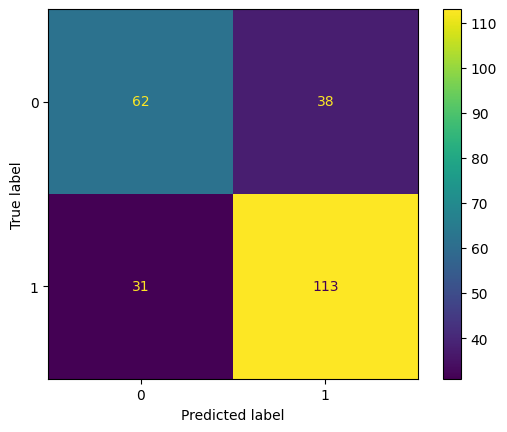

In [47]:
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_log = pd.read_pickle('./log_regr_model.pkl')
model_random_tree = pd.read_pickle('./depth7_tree.pkl')
model_knn = pd.read_pickle('./knn23_3_model.pkl')
pca_reload = pickle.load(open('pca3.pkl', 'rb'))

X_scaled_pca = pca_reload.transform(X_scaled_test_data)

pred_list_model_log = model_log.predict(X_scaled_test_data)
pred_list_model_random_tree = model_random_tree.predict(X_scaled_test_data)
pred_list_model_knn = model_knn.predict(X_scaled_pca)

correct = 0
wrong = 0
cancer = 0
not_cancer = 0

#Confusion matrix
TP = 0
FP = 0
TN = 0
FN = 0

for x in range(len(pred_list_model_log)):
    if np.sum(pred_list_model_log[x]+pred_list_model_random_tree[x]+pred_list_model_knn[x] ) > 1.5:
        cancer += 1
        if 1 == y_test_data[x]:
            TP += 1
            correct += 1
        else:
            FP += 1
            wrong +=1
    else:
        not_cancer += 1
        if 0 == y_test_data[x]:
            TN += 1
            correct += 1
        else:
            FN += 1
            wrong +=1

confusion_matrix = np.matrix([[TN, FP], [FN, TP]])

print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', correct/(correct+wrong))
print("Confusion Matrix:")
print(confusion_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=model_knn.classes_)
disp.plot()

c:\Users\andra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.4.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Correct: 176     Wrong: 68     Cancer prediction: 152     Not cancer prediction: 92     Accuracy: 0.7213114754098361
Confusion Matrix:
[[ 62  38]
 [ 30 114]]


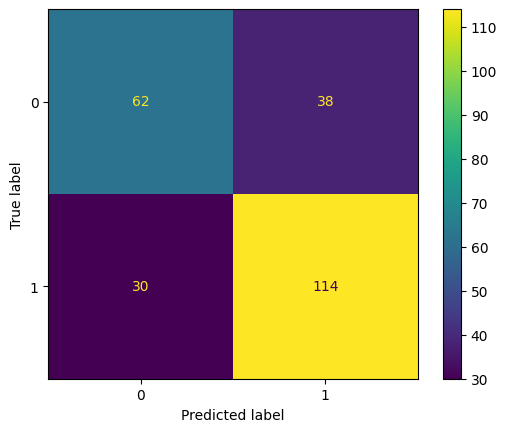

In [45]:
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_log = pd.read_pickle('./log_regr_model.pkl')
model_random_tree = pd.read_pickle('./depth7_tree.pkl')
model_knn = pd.read_pickle('./knn23_3_model.pkl')

pca_reload = pickle.load(open('pca3.pkl', 'rb'))

X_scaled_pca = pca_reload.transform(X_scaled_test_data)

pred_list_model_log_proba = model_log.predict_proba(X_scaled_test_data)
pred_list_model_tree_proba = model_random_tree.predict_proba(X_scaled_test_data)
pred_list_model_knn_proba = model_knn.predict_proba(X_scaled_pca)

pred_list_model_log_proba_norm = pred_list_model_log_proba/3
pred_list_model_random_tree_proba_norm = pred_list_model_tree_proba/3
pred_list_model_knn_proba_norm = pred_list_model_knn_proba/3


correct = 0
wrong = 0
cancer = 0
not_cancer = 0

threshold_proba = 0.5

#Confusion matrix
TP = 0
FP = 0
TN = 0
FN = 0


for x in range(len(pred_list_model_log_proba)):
    yes =  pred_list_model_random_tree_proba_norm[x][1]+pred_list_model_knn_proba_norm[x][1]+pred_list_model_log_proba_norm[x][1]
    if yes > threshold_proba:
        cancer += 1
        if 1 == y_test_data[x]:
            TP += 1
            correct += 1
        else:
            FP += 1
            wrong +=1
    else:
        not_cancer += 1
        if 0 == y_test_data[x]:
            TN += 1
            correct += 1
        else:
            FN += 1
            wrong +=1

confusion_matrix = np.matrix([[TN, FP], [FN, TP]])
print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', correct/(correct+wrong))
print("Confusion Matrix:")
print(confusion_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=model_knn.classes_)
disp.plot()
plt.savefig("final_confusion_matrix_prob.png")

In [24]:
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_log = pd.read_pickle('./log_regr_model.pkl')
model_random_tree = pd.read_pickle('./depth7_tree.pkl')
model_knn = pd.read_pickle('./knn23_3_model.pkl')

pca_reload = pickle.load(open('pca3.pkl', 'rb'))

X_scaled_pca = pca_reload.transform(X_scaled_test_data)

threshold_log=0.52
threshold_knn=0.55
threshold_tree=0.43

counter=0

pred_list_model_log_proba = model_log.predict_proba(X_scaled_test_data)
pred_list_model_tree_proba = model_random_tree.predict_proba(X_scaled_test_data)
pred_list_model_knn_proba = model_knn.predict_proba(X_scaled_pca)

#pred_list_model_log_proba_norm = pred_list_model_log_proba/n_models
#pred_list_model_random_tree_proba_norm = pred_list_model_tree_proba/n_models
#pred_list_model_knn_proba_norm = pred_list_model_knn_proba/n_models


correct = 0
wrong = 0
cancer = 0
not_cancer = 0

threshold_proba = 0.5

#Confusion matrix
TP = 0
FP = 0
TN = 0
FN = 0


for x in range(len(pred_list_model_log_proba)):
    counter=0
    if pred_list_model_log_proba[x][1] > threshold_log:
        counter+=1
    if pred_list_model_tree_proba[x][1] > threshold_tree:
        counter+=1
    if pred_list_model_knn_proba[x][1] > threshold_knn:
        counter+=1

    if counter> 1.5:
        cancer += 1
        if 1 == y_test_data[x]:
            TP += 1
            correct += 1
        else:
            FP += 1
            wrong +=1
    else:
        not_cancer += 1
        if 0 == y_test_data[x]:
            TN += 1
            correct += 1
        else:
            FN += 1
            wrong +=1

confusion_matrix = np.matrix([[TN, FP], [FN, TP]])

print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', correct/(correct+wrong))
print("Confusion Matrix:")
print(confusion_matrix)

Correct: 178     Wrong: 66     Cancer prediction: 156     Not cancer prediction: 88     Accuracy: 0.7295081967213115
Confusion Matrix:
[[ 61  39]
 [ 27 117]]


c:\Users\andra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.4.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [36]:
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_log = pd.read_pickle('./log_regr_model.pkl')
model_random_tree = pd.read_pickle('./depth7_tree.pkl')
model_knn = pd.read_pickle('./knn23_3_model.pkl')

pca_reload = pickle.load(open('pca3.pkl', 'rb'))

X_scaled_pca = pca_reload.transform(X_scaled_test_data)

threshold_log=0.52
threshold_knn=0.55
threshold_tree=0.43

counter=0

pred_list_model_log_proba = model_log.predict_proba(X_scaled_test_data)
pred_list_model_tree_proba = model_random_tree.predict_proba(X_scaled_test_data)
pred_list_model_knn_proba = model_knn.predict_proba(X_scaled_pca)

#pred_list_model_log_proba_norm = pred_list_model_log_proba/n_models
#pred_list_model_random_tree_proba_norm = pred_list_model_tree_proba/n_models
#pred_list_model_knn_proba_norm = pred_list_model_knn_proba/n_models


threshold_proba = 0.5
t=dict()
c=dict()
threshold=0.01
for i in range(100):
    correct = 0
    wrong = 0
    cancer = 0
    not_cancer = 0
    #Confusion matrix
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for x in range(len(pred_list_model_log_proba)):
        counter=0
        if pred_list_model_log_proba[x][1] > threshold_log:
            counter+=pred_list_model_log_proba[x][1]
        if pred_list_model_tree_proba[x][1] > threshold_tree:
            counter+=pred_list_model_tree_proba[x][1]
        if pred_list_model_knn_proba[x][1] > threshold_knn:
            counter+=pred_list_model_knn_proba[x][1]

        if counter > threshold:
            cancer += 1
            if 1 == y_test_data[x]:
                TP += 1
                correct += 1
            else:
                FP += 1
                wrong +=1
        else:
            not_cancer += 1
            if 0 == y_test_data[x]:
                TN += 1
                correct += 1
            else:
                FN += 1
                wrong +=1

    confusion_matrix = np.matrix([[TN, FP], [FN, TP]])
    acc=correct/(correct+wrong)
    t[acc]=threshold
    c[acc]=confusion_matrix
    if acc > 0.7:
        pass
        #print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', acc)
        #print("Confusion Matrix:")
        #print(confusion_matrix)
    threshold+=0.01

acc=max(t.keys())
thresh=t[acc]
confmatrix=c[acc]
print(thresh)
print(acc)
print(confmatrix)

c:\Users\andra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.4.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


0.6800000000000004
0.7336065573770492
[[ 61  39]
 [ 26 118]]


In [22]:
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_log = pd.read_pickle('./log_regr_model.pkl')
model_random_tree = pd.read_pickle('./depth7_tree.pkl')
model_knn = pd.read_pickle('./knn23_3_model.pkl')

pca_reload = pickle.load(open('pca3.pkl', 'rb'))

X_scaled_pca = pca_reload.transform(X_scaled_test_data)

pred_list_model_log_proba = model_log.predict_proba(X_scaled_test_data)
pred_list_model_tree_proba = model_random_tree.predict_proba(X_scaled_test_data)
pred_list_model_knn_proba = model_knn.predict_proba(X_scaled_pca)

n_models=1

pred_list_model_log_proba_norm = pred_list_model_log_proba/n_models
pred_list_model_random_tree_proba_norm = pred_list_model_tree_proba/n_models
pred_list_model_knn_proba_norm = pred_list_model_knn_proba/n_models
threshold_proba = 0.5


threshold_test=0.0


for i in range(100):
    correct = 0
    wrong = 0
    cancer = 0
    not_cancer = 0
    #Confusion matrix
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for x in range(len(pred_list_model_log_proba)):
        no =  pred_list_model_random_tree_proba_norm[x][0]
        yes = pred_list_model_random_tree_proba_norm[x][1]
        if yes > threshold_test:
            cancer += 1
            if 1 == y_test_data[x]:
                TP += 1
                correct += 1
            else:
                FP += 1
                wrong +=1
        else:
            not_cancer += 1
            if 0 == y_test_data[x]:
                TN += 1
                correct += 1
            else:
                FN += 1
                wrong +=1
    acc = correct/(correct+wrong)
    if acc > 0.68:
        print(threshold_test)
        confusion_matrix = np.matrix([[TN, FP], [FN, TP]])
        print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', acc)
        print("Confusion Matrix:")
        print(confusion_matrix)
    threshold_test+=0.01

c:\Users\andra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.4.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


0.35000000000000014
Correct: 167     Wrong: 77     Cancer prediction: 211     Not cancer prediction: 33     Accuracy: 0.6844262295081968
Confusion Matrix:
[[ 28  72]
 [  5 139]]
0.36000000000000015
Correct: 174     Wrong: 70     Cancer prediction: 204     Not cancer prediction: 40     Accuracy: 0.7131147540983607
Confusion Matrix:
[[ 35  65]
 [  5 139]]
0.37000000000000016
Correct: 178     Wrong: 66     Cancer prediction: 198     Not cancer prediction: 46     Accuracy: 0.7295081967213115
Confusion Matrix:
[[ 40  60]
 [  6 138]]
0.38000000000000017
Correct: 178     Wrong: 66     Cancer prediction: 192     Not cancer prediction: 52     Accuracy: 0.7295081967213115
Confusion Matrix:
[[ 43  57]
 [  9 135]]
0.3900000000000002
Correct: 179     Wrong: 65     Cancer prediction: 189     Not cancer prediction: 55     Accuracy: 0.7336065573770492
Confusion Matrix:
[[ 45  55]
 [ 10 134]]
0.4000000000000002
Correct: 179     Wrong: 65     Cancer prediction: 183     Not cancer prediction: 61     Accu